## Titanic survived Project
Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Attribute Information
Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There are some columns i.e. PassengerId, name, Ticket Fare & Embarked, I think they may not contribute to model building. So, need to drop thies columns.

In [29]:
df.drop(columns=['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [31]:
df.shape

(891, 9)

There are 891 raws and 9 columns

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


There are 4 int64, 3 bojects and 2 float64 datatypes available in this dataset

In [33]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are null vlaues also available in this dataset.
In Cabin column there are huge null values. So, need to drop this column

In [34]:
df=df.drop('Cabin', axis=1)

In [35]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Now, need to address 'Age' & ' Embarked' columns

In [40]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [47]:
df['Embarked'].fillna(value=df['Embarked'].mode()[0], inplace=True)

In [48]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Need to convert 'Embarked' & 'Sex' columns from category to continue datatype

In [50]:
df['Sex']=df['Sex'].replace({'male':1,'female':0})

In [51]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
lab_enc=LabelEncoder()

In [55]:
df2=lab_enc.fit_transform(df['Embarked'])

In [57]:
df['Embarked']=df2

In [60]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [62]:
# Now, checking unique values in this dataset
for i in df.columns:
    print(df[i].value_counts(),"\n")

0    549
1    342
Name: Survived, dtype: int64 

3    491
1    216
2    184
Name: Pclass, dtype: int64 

1    577
0    314
Name: Sex, dtype: int64 

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64 

2    646
0    168
1     77
Name: Embarked, dtype: int64 



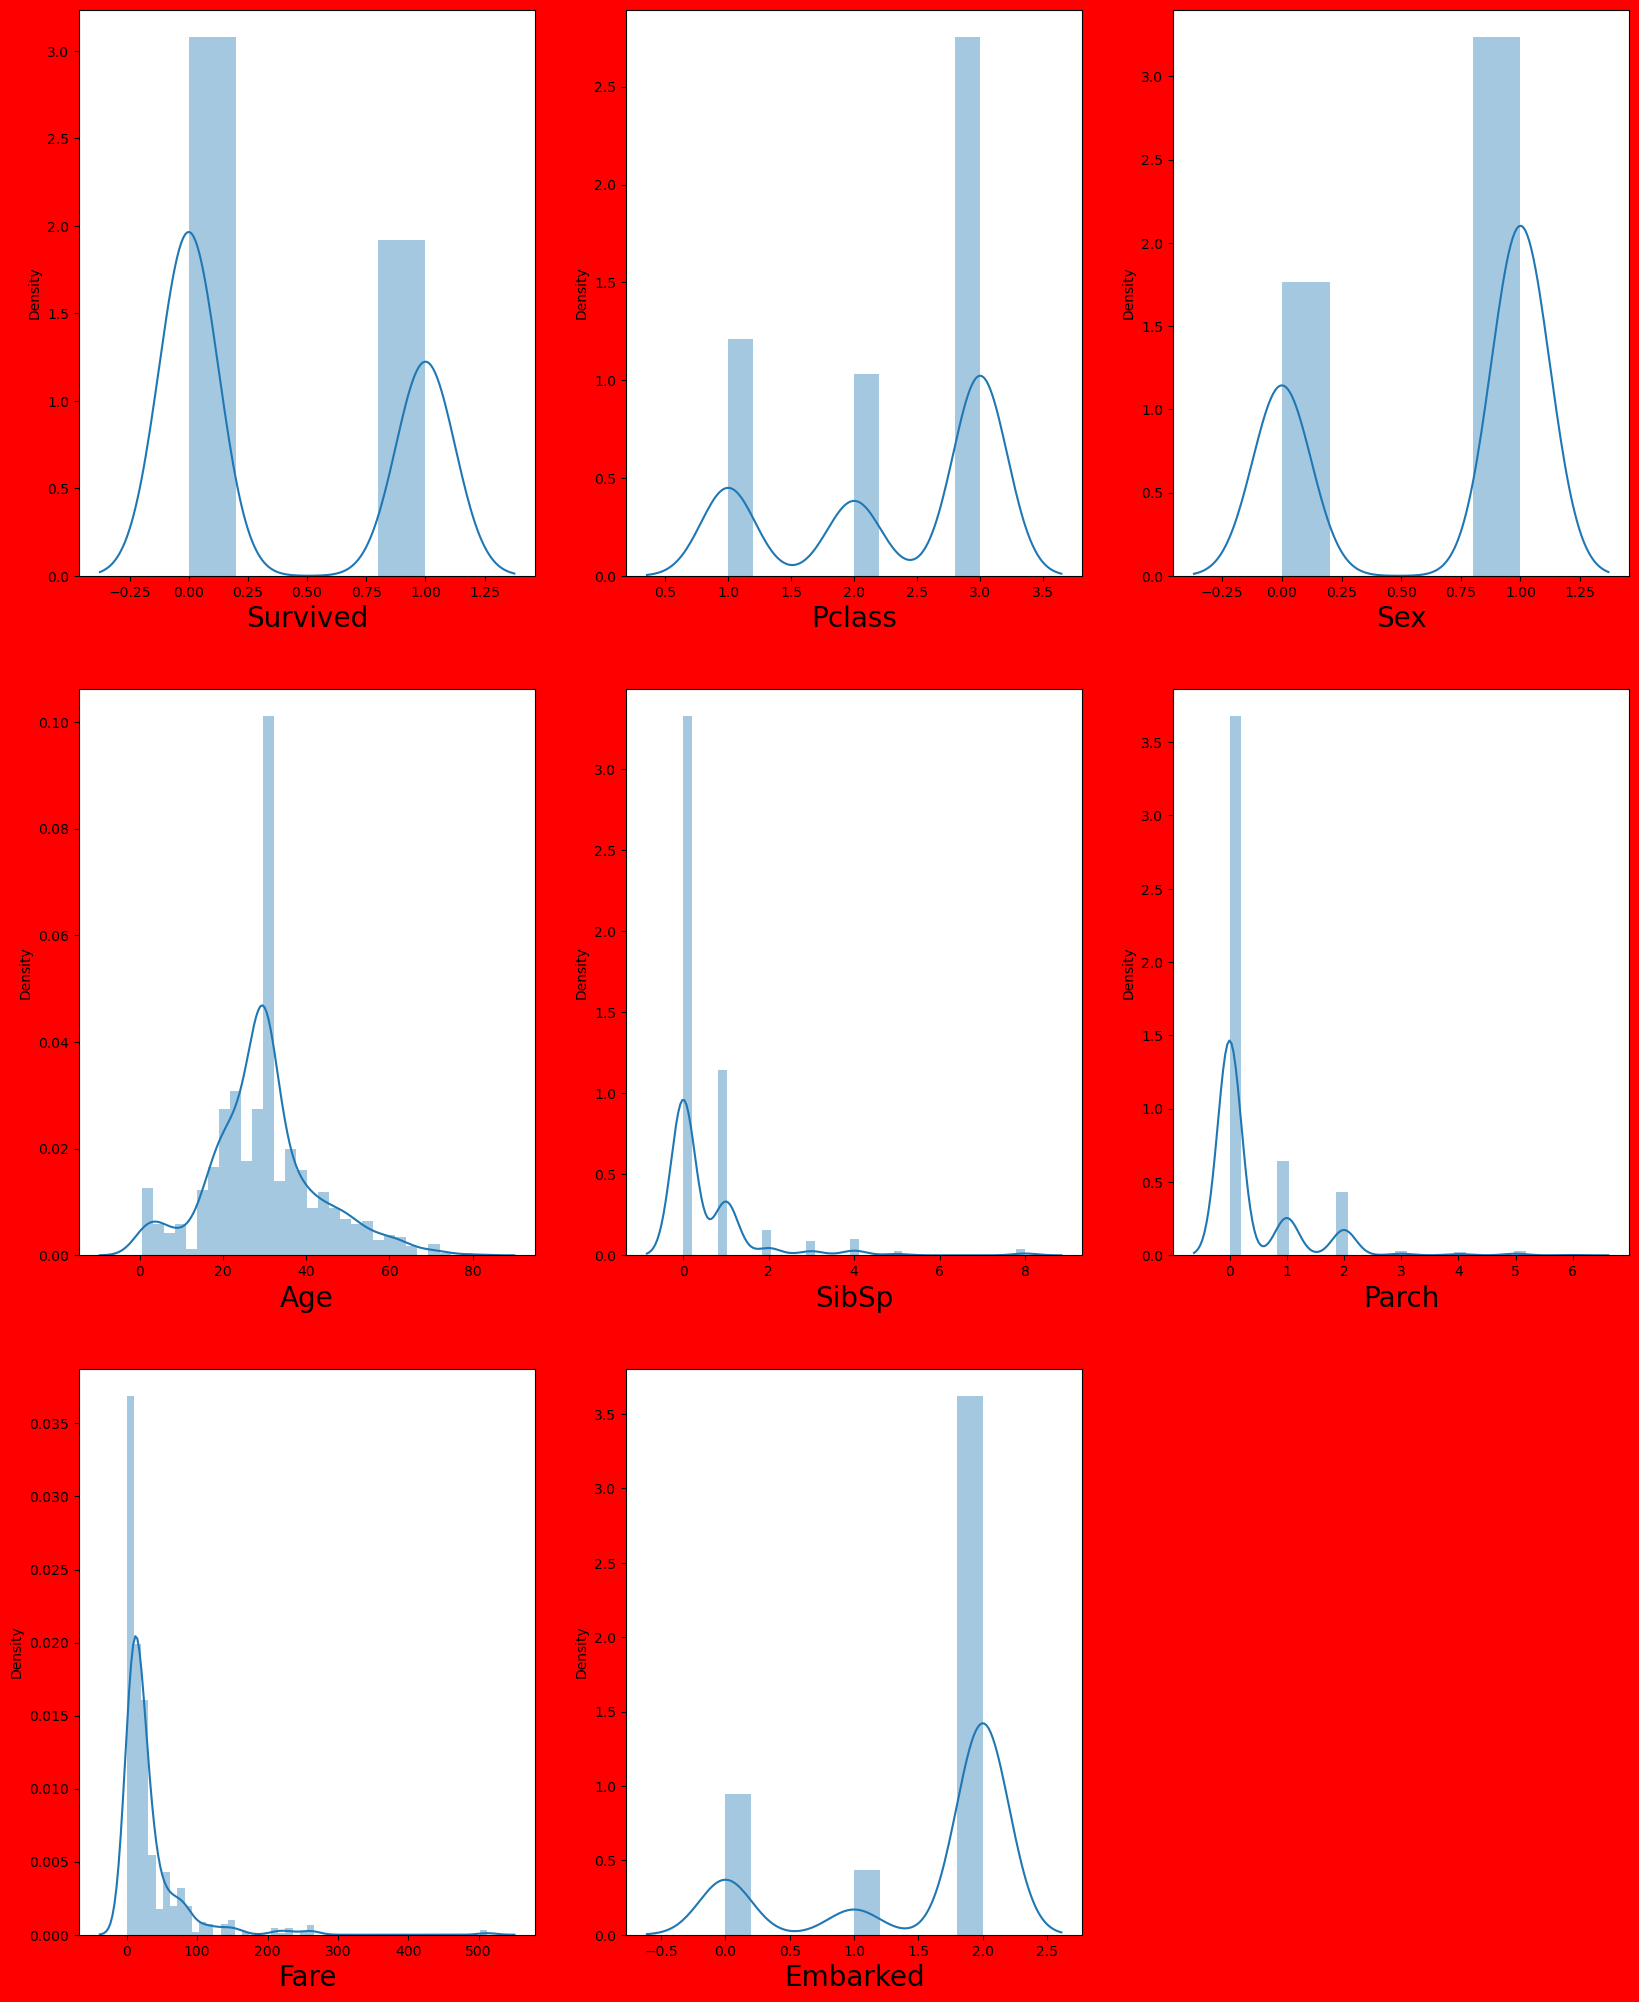

In [63]:
plt.figure(figsize=(20,25), facecolor='r')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

Here, I can see there are some outliers present in some columns i.e.'SibSp', 'Parch' & 'Fare'.

Again I want to check the outliers in boxplot 

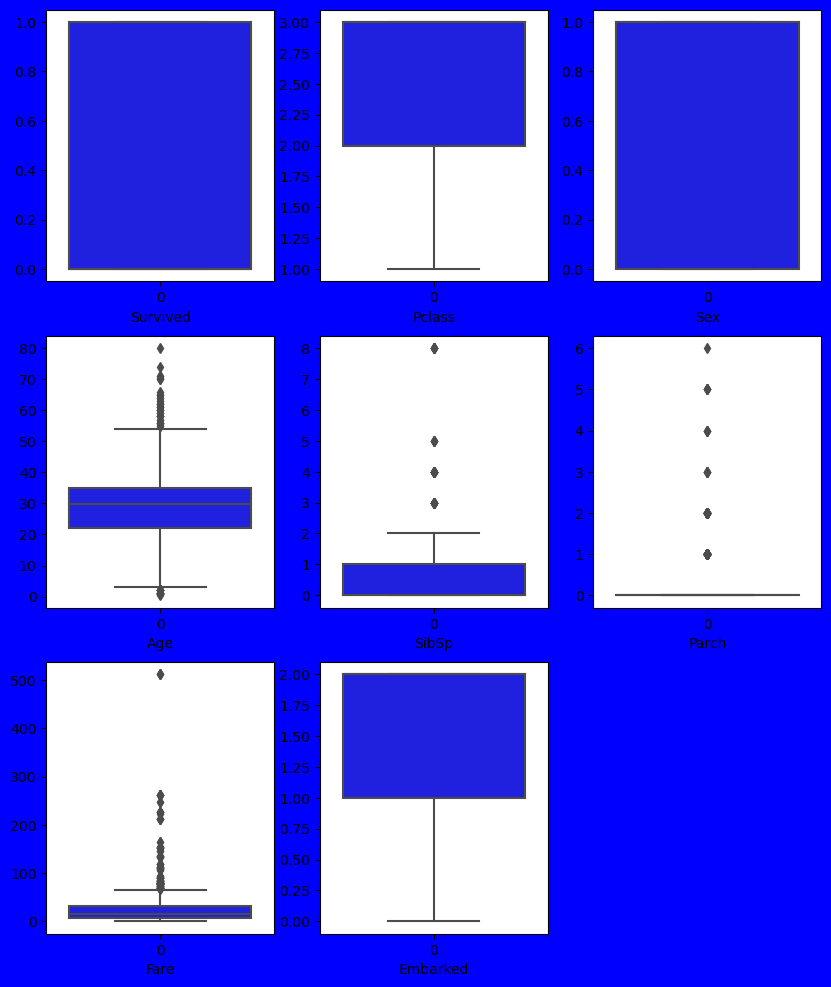

In [65]:
plt.figure(figsize=(10,12), facecolor='b')
plotnumber=1

for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

As per above graph I can see other outliers can be accepted except 'Fare' column

I wll address this outliers by applying zscore method.

In [74]:
from scipy.stats import zscore

In [80]:
z_score=zscore(df[['Age','SibSp','Parch','Fare']])

In [81]:
z_score

,Age,SibSp,Parch,Fare
0,-0.592481,0.432793,-0.473674,-0.502445
1,0.638789,0.432793,-0.473674,0.786845
2,-0.284663,-0.474545,-0.473674,-0.488854
3,0.407926,0.432793,-0.473674,0.420730
4,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...
886,-0.207709,-0.474545,-0.473674,-0.386671
887,-0.823344,-0.474545,-0.473674,-0.044381
888,0.000000,0.432793,2.008933,-0.176263
889,-0.284663,-0.474545,-0.473674,-0.044381


In [82]:
abs_z_score=np.abs(z_score)

In [83]:
filter_entry=(abs_z_score<3).all(axis=1)

In [84]:
df=df[filter_entry]

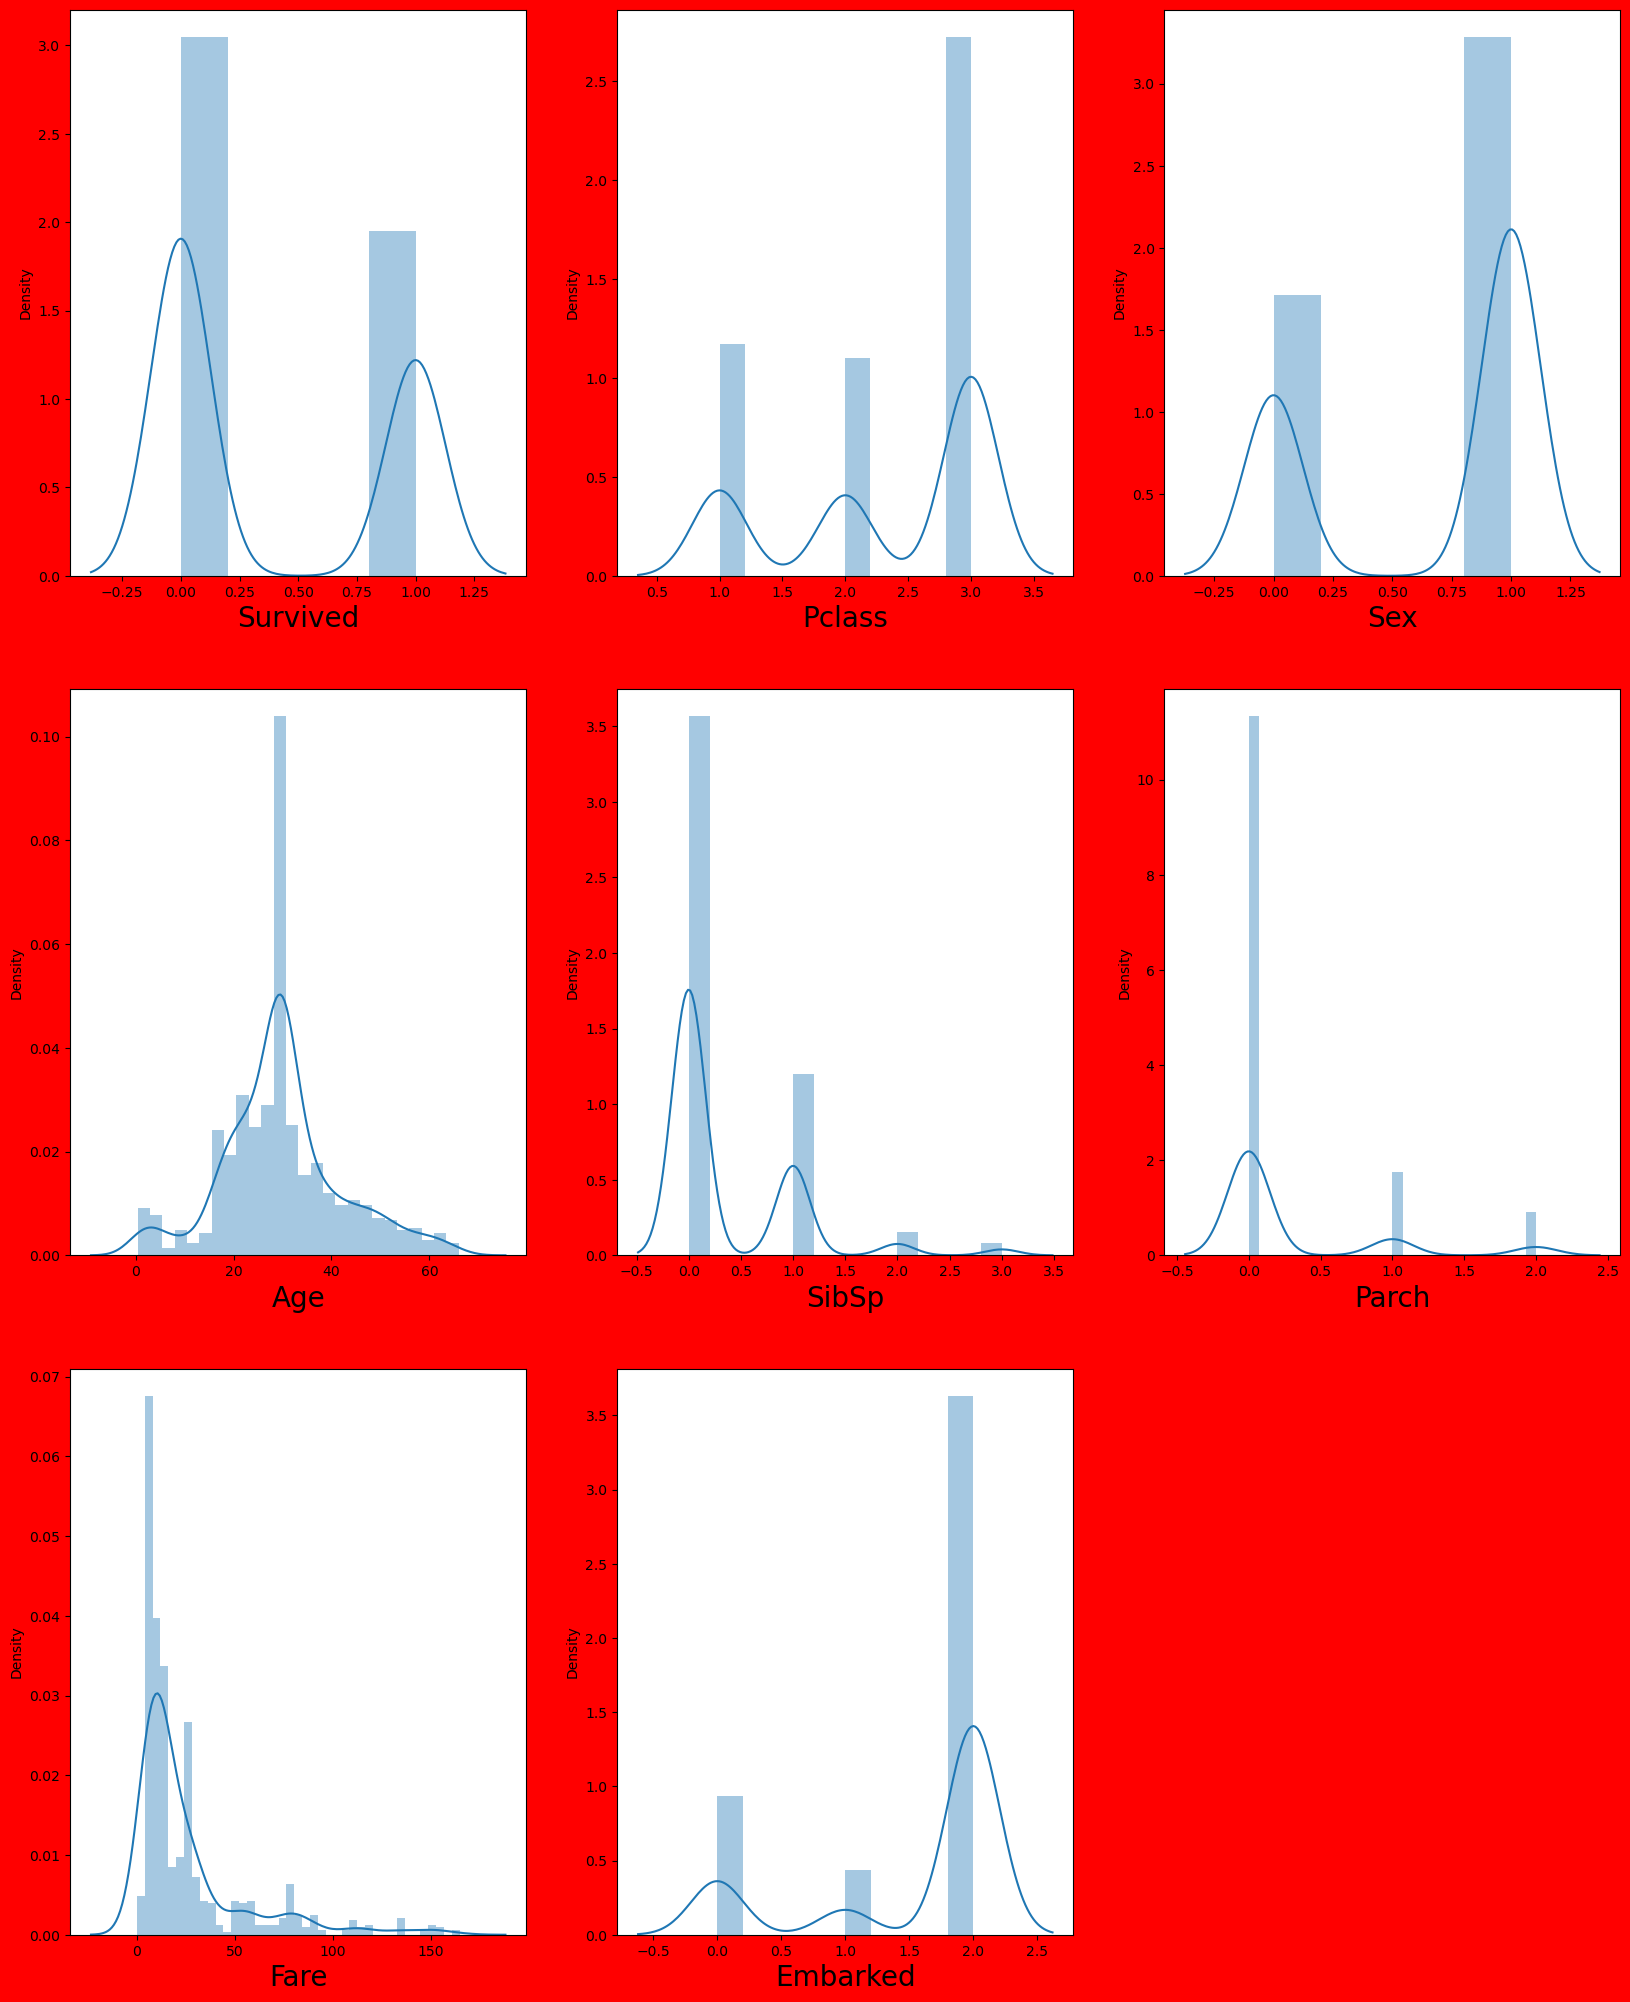

In [87]:
plt.figure(figsize=(20,25), facecolor='r')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [88]:
df.shape

(820, 8)

After applying Zscore we have removed some outliers. Now we have 820 rows and 8 columns remain.

In [89]:
# Now checking multicollinearity issue by using correlation matrix 
df_corr=df.corr().abs()

<Axes: >

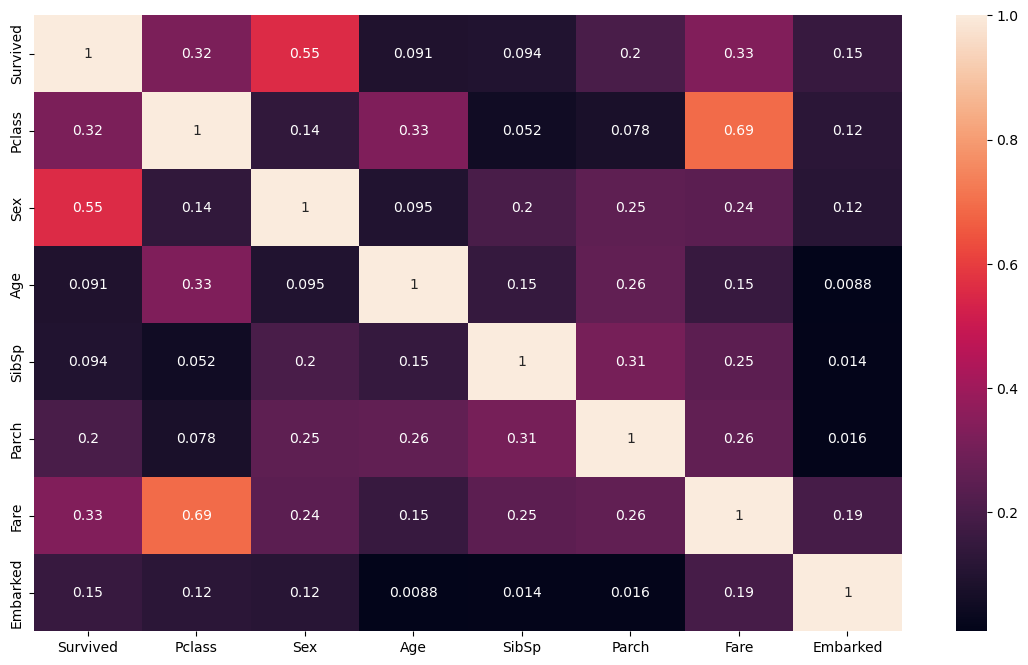

In [90]:
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})

I think there is no correlation among features

In [93]:
from sklearn.preprocessing import StandardScaler

In [95]:
x=df.drop('Survived', axis=1)
y=df.Survived

In [96]:
scaler=StandardScaler()

In [98]:
x_scaled=scaler.fit_transform(x)

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x_scaled, i) for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,2.155729,Pclass
1,1.133353,Sex
2,1.250906,Age
3,1.185721,SibSp
4,1.277620,Parch
5,2.283714,Fare
6,1.049620,Embarked


I thing there is no coorelation with features

In [114]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [117]:
mac=0
mrs=0

for i in range(1, 200):
    x_train, x_test, y_train, y_test=tts(x_scaled, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>mac:
        mac=acc
        mrs=i
print("Best Accuracy score is :", mac*100, "at Random_state :", mrs)

Best Accuracy score is : 85.85365853658537 at Random_state : 14


In [129]:
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()

In [127]:
models={'RandomForestClassifier':rfc,'ExtraTreesClassifier':etc,'LogisticRegression':lr,'KNeighborsClassifier':knn,'DecisionTreeClassifier':dtc,'GradientBoostingClassifier':gbc,'AdaBoostClassifier':abc,'BaggingClassifier':bc}

In [125]:
x_train, x_test, y_train, y_test=tts(x_scaled, y, test_size=0.25, random_state=mrs)

Thresholds of : RandomForestClassifier [2.00000000e+00 1.00000000e+00 9.90000000e-01 9.80000000e-01
 9.70000000e-01 9.65277778e-01 9.60000000e-01 9.50000000e-01
 9.40000000e-01 9.30000000e-01 9.23333333e-01 9.20000000e-01
 9.00000000e-01 8.99365079e-01 8.80000000e-01 8.50000000e-01
 8.40781746e-01 8.22550866e-01 8.20000000e-01 8.00000000e-01
 7.90000000e-01 7.85086580e-01 7.70000000e-01 7.69000000e-01
 7.42500000e-01 7.30000000e-01 7.20333333e-01 6.90000000e-01
 6.70000000e-01 6.44166667e-01 5.90000000e-01 5.70000000e-01
 5.64761905e-01 5.45714286e-01 4.90000000e-01 4.68666667e-01
 4.60000000e-01 4.55000000e-01 4.50000000e-01 4.40000000e-01
 4.20000000e-01 4.10000000e-01 4.00000000e-01 3.70000000e-01
 3.30000000e-01 3.20000000e-01 3.08785714e-01 2.80000000e-01
 2.60000000e-01 2.59330447e-01 2.40000000e-01 2.30000000e-01
 2.20000000e-01 2.15000000e-01 2.10000000e-01 2.02833333e-01
 2.00000000e-01 1.79000000e-01 1.77572511e-01 1.70000000e-01
 1.60000000e-01 1.47500000e-01 1.40000000e-01 

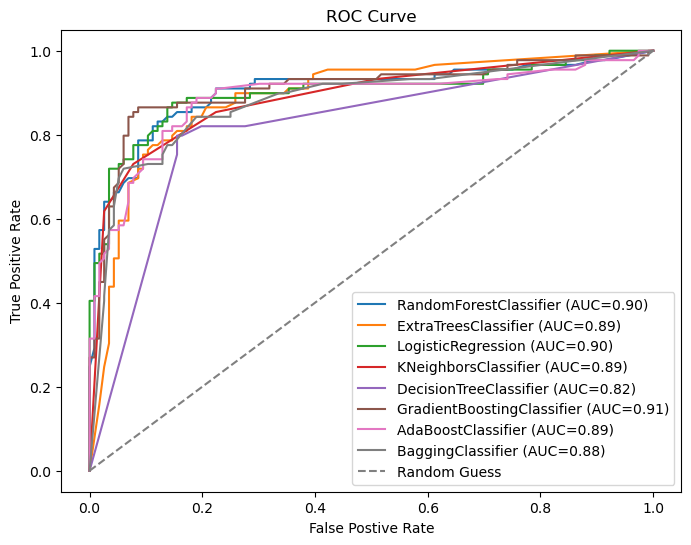

In [128]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    model.fit(x_train, y_train)
    y_prob=model.predict_proba(x_test)[:,1]
    fpr, tpr,_=roc_curve(y_test, y_prob)
    print('Thresholds of :', name, _)
    roc_auc=auc(fpr, tpr)
    plt.plot(fpr,tpr,label='{} (AUC={:.2f})'.format (name,roc_auc))

plt.plot([0,1], [0,1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

As per above graph GradientBoostingClassifier is best model followed by RandomForestClassifier and LogisticRegression

In [135]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [136]:
ygbcpred=rfc.predict(x_test)

In [138]:
score=cross_val_score(gbc, x_scaled, y)
print(score)
print(score.mean())
print('Diffrence between accuracy score & Cross Validation Score',accuracy_score(y_test, ygbcpred)-(score.mean()))

[0.76829268 0.82317073 0.82317073 0.79268293 0.81097561]
0.8036585365853657
Diffrence between accuracy score & Cross Validation Score 0.050000000000000155


In [139]:
lr.fit(x_train, y_train)

LogisticRegression()

In [140]:
ylrpred=lr.predict(x_test)

In [141]:
score=cross_val_score(lr, x_scaled, y)
print(score)
print(score.mean())
print('Diffrence between accuracy score & Cross Validation Score',accuracy_score(y_test, ylrpred)-(score.mean()))

[0.78658537 0.7804878  0.7804878  0.79268293 0.81097561]
0.7902439024390244
Diffrence between accuracy score & Cross Validation Score 0.06829268292682922


In [131]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [132]:
yrfcpred=rfc.predict(x_test)

In [134]:
score=cross_val_score(rfc, x_scaled, y)
print(score)
print(score.mean())
print('Diffrence between accuracy score & Cross Validation Score',accuracy_score(y_test, yrfcpred)-(score.mean()))

[0.7804878  0.79878049 0.84146341 0.76829268 0.82317073]
0.802439024390244
Diffrence between accuracy score & Cross Validation Score 0.051219512195121886


As per above Cross Validation Score best model is GradientBoostingClassifier. Now, I will use GridSearchCV hyperparameters tunning method for model performance.

In [142]:
from sklearn.model_selection import GridSearchCV

In [147]:
param={"criterion": ["friedman_mse",  "mae"],
       "loss":["deviance","exponential"],
       'learning_rate': [0.01,0.05,0.1,1,0.5],
        'max_depth': [3,4,5],
       'min_samples_leaf': [4,5,6],
       'subsample': [0.6,0.7,0.8],
       'n_estimators': [5,10,15,20],
      }

In [148]:
gcv=GridSearchCV(GradientBoostingClassifier(),param,cv=5)

In [149]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.05, 0.1, 1, 0.5],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [4, 5, 6],
                         'n_estimators': [5, 10, 15, 20],
                         'subsample': [0.6, 0.7, 0.8]})

In [150]:
gcv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'n_estimators': 15,
 'subsample': 0.6}

In [151]:
final_model=GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.05,loss='deviance',max_depth=5, min_samples_leaf=5, n_estimators=15, subsample=0.6)

In [152]:
final_model.fit(x_train, y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test, pred)

In [153]:
acc

0.8439024390243902

I am able to increase the score by 4% after applying hyperparameters tunning method. Before applying hyperparameters tunning score was 80%

In [155]:
import joblib
joblib.dump(final_model,'final_model.pkl')

['final_model.pkl']